In [1]:
%matplotlib inline 

import requests 
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
import numpy as np
import pandas as pd # pandas
import matplotlib.pyplot as plt # module for plotting 
import datetime as dt # module for manipulating dates and times
import numpy.linalg as lin # module for performing linear algebra operations
#from __future__ import division
from math import log10,exp
import seaborn as sns
import scipy as sp
import sklearn
import sklearn.model_selection
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import csv

pd.options.display.mpl_style = 'default'

C:\Users\User\AppData\Local\conda\conda\envs\tf15\lib\site-packages\IPython\core\interactiveshell.py:3267: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [2]:
import warnings
import itertools
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
import matplotlib

In [3]:
dataset_Bined_Noise_Accu_Elec_Final1 = pd.read_csv('Data/Processed/dataset_Bined_Noise_Accu_Elec_Final.csv')
dataset_Bined_Accu_Elec_Final1 = pd.read_csv('Data/Processed/dataset_Bined_Accu_Elec_Final.csv')
dataset_Extact_Accu_Elec_Final1 = pd.read_csv('Data/Processed/dataset_Extact_Accu_Elec_Final.csv')

hourlyTimestamp = pd.date_range(start = '2012-07-01 00:30:00', end = '2013-07-01', freq ="30min")
hourlyTimestamp
dataset_Bined_Noise_Accu_Elec_Final1.index=hourlyTimestamp
dataset_Bined_Accu_Elec_Final1.index=hourlyTimestamp
dataset_Extact_Accu_Elec_Final1.index=hourlyTimestamp
dataset_Extact_Accu_Elec_Final1

,Unnamed: 0,Column1
2012-07-01 00:30:00,2012-07-01 00:30:00,-12.587
2012-07-01 01:00:00,2012-07-01 01:00:00,-13.208
2012-07-01 01:30:00,2012-07-01 01:30:00,-12.332
2012-07-01 02:00:00,2012-07-01 02:00:00,-11.695
2012-07-01 02:30:00,2012-07-01 02:30:00,-10.482
2012-07-01 03:00:00,2012-07-01 03:00:00,-9.974
2012-07-01 03:30:00,2012-07-01 03:30:00,-8.804
2012-07-01 04:00:00,2012-07-01 04:00:00,-8.571
2012-07-01 04:30:00,2012-07-01 04:30:00,-8.386
2012-07-01 05:00:00,2012-07-01 05:00:00,-8.096


In [4]:
dataset_Bined_Noise_Accu_Elec_Final_train = pd.DataFrame(data=dataset_Bined_Noise_Accu_Elec_Final1.Column1, index=pd.date_range(start = '2013-01-28 12:30:00', end = '2013-02-04 13:00:00', freq ="30min")).dropna()
dataset_Bined_Accu_Elec_Final_train = pd.DataFrame(data=dataset_Bined_Accu_Elec_Final1.Column1, index=pd.date_range(start ='2013-01-28 12:30:00', end ='2013-02-04 13:00:00',  freq ="30min")).dropna()
dataset_Extact_Accu_Elec_Final_train = pd.DataFrame(data=dataset_Extact_Accu_Elec_Final1.Column1, index=pd.date_range(start ='2013-01-28 12:30:00', end ='2013-02-04 13:00:00',  freq ="30min")).dropna()

dataset_Bined_Noise_Accu_Elec_Final_test = pd.DataFrame(data=dataset_Bined_Noise_Accu_Elec_Final1.Column1, index=pd.date_range(start ='2013-02-04 13:30:00', end ='2013-02-11 12:30:00',  freq ="30min")).dropna()
dataset_Bined_Accu_Elec_Final_test = pd.DataFrame(data=dataset_Bined_Accu_Elec_Final1.Column1, index=pd.date_range(start ='2013-02-04 13:30:00', end ='2013-02-11 12:30:00',  freq ="30min")).dropna()
dataset_Extact_Accu_Elec_Final_test = pd.DataFrame(data=dataset_Extact_Accu_Elec_Final1.Column1, index=pd.date_range(start ='2013-02-04 13:30:00', end ='2013-02-11 12:30:00',  freq ="30min")).dropna()

dataset_Bined_Noise_Accu_Elec_Final_test

,Column1
2013-02-04 13:30:00,19.05900
2013-02-04 14:00:00,19.70575
2013-02-04 14:30:00,18.31800
2013-02-04 15:00:00,12.04550
2013-02-04 15:30:00,6.27450
2013-02-04 16:00:00,2.59550
2013-02-04 16:30:00,4.31850
2013-02-04 17:00:00,-1.82575
2013-02-04 17:30:00,-10.60900
2013-02-04 18:00:00,-24.53075


In [5]:
pdq_Selected = [(4, 1, 1),(4,0,2),(3, 0, 3),(3, 0, 2),(4, 1, 3),(1, 0, 0),(4, 0, 0)]
pdq_Selected

[(4, 1, 1), (4, 0, 2), (3, 0, 3), (3, 0, 2), (4, 1, 3), (1, 0, 0), (4, 0, 0)]

In [6]:
y = dataset_Bined_Noise_Accu_Elec_Final_train.values
test=dataset_Bined_Noise_Accu_Elec_Final_test.values
predictions = [None] * len(test)
for t in range(len(test)):
    for param in pdq_Selected:
        try:
            for p in range(15):
                try:
                    y_temp=y+np.random.laplace(loc=0.0, scale=(0.0+1*p), size=y.shape)
                    model = ARIMA(y_temp, order=param)
                    model_fit = model.fit(disp=0)
                    output = model_fit.forecast()
                    yhat = output[0]
                    predictions[t]=yhat
                    obs = test[t]
                    y=np.append(y[1:],obs)
                    print('predicted=%f, expected=%f' % (yhat, obs))
                except:             
                    continue
                else:
                    break
        except:             
            continue
        else:
            break

predicted=25.474510, expected=19.059000
predicted=17.315351, expected=19.705750
predicted=21.399891, expected=18.318000
predicted=17.074674, expected=12.045500
predicted=12.148787, expected=6.274500
predicted=6.396105, expected=2.595500
predicted=2.137244, expected=4.318500
predicted=2.740642, expected=-1.825750
predicted=-3.802610, expected=-10.609000
predicted=-10.270369, expected=-24.530750
predicted=-26.498189, expected=-20.369000
predicted=-19.500399, expected=-21.160000
predicted=-23.430466, expected=-23.444500
predicted=-22.438066, expected=-21.542500
predicted=-19.943058, expected=-19.375750
predicted=-19.658280, expected=-21.573000
predicted=-21.588741, expected=-22.637500
predicted=-22.230400, expected=-17.192500
predicted=-17.154060, expected=-17.820000
predicted=-17.374634, expected=-21.934750
predicted=-20.060201, expected=-15.443500
predicted=-13.861817, expected=-13.428250
predicted=-13.852486, expected=-12.287500
predicted=-12.853120, expected=-10.153500
predicted=-9.33

predicted=-19.241387, expected=-20.157250
predicted=-23.570763, expected=-23.042500
predicted=-25.986661, expected=-24.709250
predicted=-26.815679, expected=-24.913500
predicted=-26.426577, expected=-29.886000
predicted=-30.781600, expected=-29.559000
predicted=-30.526765, expected=-26.692750
predicted=-28.010662, expected=-27.894500
predicted=-28.079194, expected=-20.681000
predicted=-20.305931, expected=-24.508750
predicted=-23.587318, expected=-22.183000
predicted=-21.016595, expected=-19.440250
predicted=-19.377371, expected=-16.795000
predicted=-16.182212, expected=-12.391500
predicted=-11.282121, expected=-12.893000
predicted=-11.355014, expected=-12.332250
predicted=-10.968811, expected=-13.827000
predicted=-13.265392, expected=-12.555000
predicted=-12.511242, expected=-10.530000
predicted=-10.656225, expected=-10.614750
predicted=-10.202708, expected=-10.127750
predicted=-9.568522, expected=-13.243000
predicted=-12.912907, expected=-11.786000
predicted=-12.026730, expected=-15.

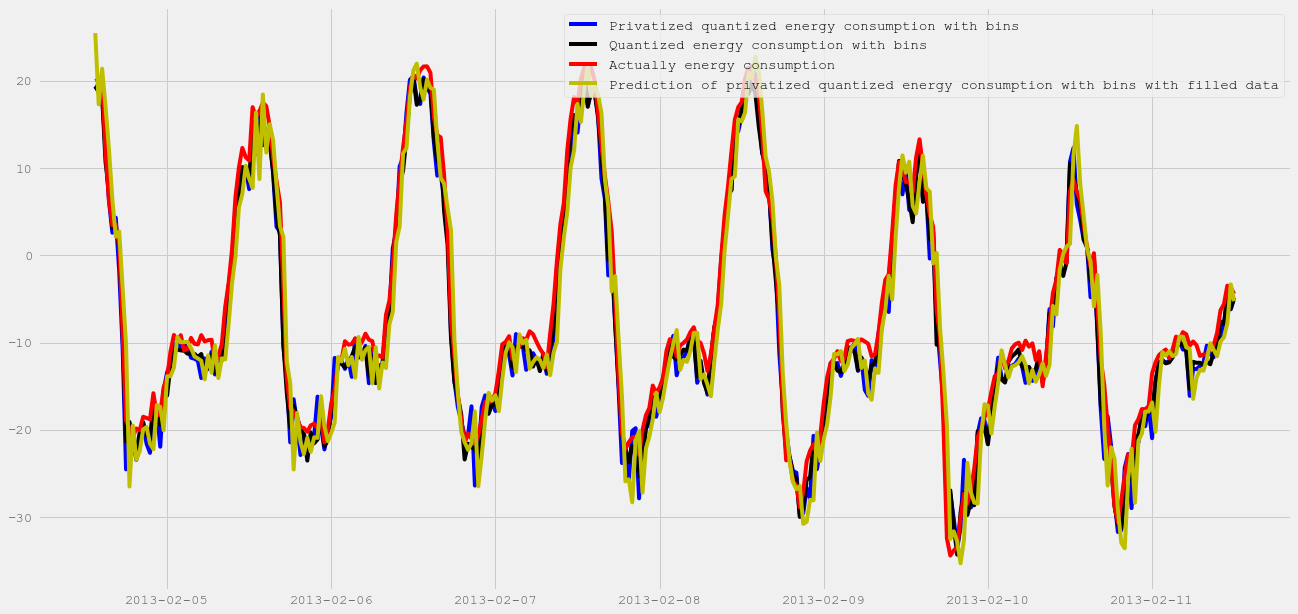

In [7]:
fig = plt.figure(figsize=(20,10))
plt.plot(dataset_Bined_Noise_Accu_Elec_Final_test[:len(predictions)-1].index, dataset_Bined_Noise_Accu_Elec_Final_test[:len(predictions)-1].Column1, label='Privatized quantized energy consumption with bins', color='b')
plt.plot(dataset_Bined_Noise_Accu_Elec_Final_test[:len(predictions)-1].index, dataset_Bined_Accu_Elec_Final_test[:len(predictions)-1].Column1, label='Quantized energy consumption with bins', color='k')
plt.plot(dataset_Bined_Noise_Accu_Elec_Final_test[:len(predictions)-1].index, dataset_Extact_Accu_Elec_Final_test[:len(predictions)-1].Column1, label='Actually energy consumption', color='r')
#plt.plot(dataset_Bined_Noise_Accu_Elec_Final_test[:len(predictions)-1].index, predictions[1:len(predictions)], label='Prediction of privatized quantized energy consumption with bins', color='g')
plt.plot(dataset_Bined_Noise_Accu_Elec_Final_test[:len(predictions)-1].index, predictions[:len(predictions)-1], label='Prediction of privatized quantized energy consumption with bins with filled data', color='y')

plt.legend(loc='upper right')
#plt.plot(predictions[1:len(predictions)], color='red')

In [8]:
predictions1=np.concatenate(predictions, axis=0 )
predictions2=predictions1.reshape(-1,1)
predictions1

array([ 25.47451012,  17.31535119,  21.39989098,  17.07467355,
        12.14878716,   6.39610525,   2.13724362,   2.74064217,
        -3.80260995, -10.27036897, -26.49818942, -19.50039944,
       -23.43046581, -22.4380659 , -19.94305832, -19.65828032,
       -21.58874103, -22.2304005 , -17.15405971, -17.37463384,
       -20.06020112, -13.86181696, -13.85248638, -12.85311978,
        -9.33201278,  -9.94268365,  -9.93892424,  -9.92239439,
       -10.63957015, -11.58366169, -11.81282361, -12.07876265,
       -14.21603136, -11.45246383, -13.45057132, -10.31446704,
       -14.06218994, -11.78962917, -11.93036749,  -7.85787538,
        -3.13684126,  -0.0860096 ,   5.47607763,   7.04965904,
        10.27289133,   8.78304228,   7.72272863,  16.39162312,
         8.74030857,  18.44149781,  11.77948426,  15.03914123,
        13.19769056,   7.97323588,   3.32933604,   2.12657447,
       -12.21827127, -14.65523884, -24.54378804, -18.06098057,
       -21.35487842, -22.78632815, -20.91314275, -22.51

In [9]:
dataset_Prediction = pd.DataFrame({'Column1':predictions1})
dataset_Prediction.index=dataset_Bined_Noise_Accu_Elec_Final_test.index
dataset_Prediction

,Column1
2013-02-04 13:30:00,25.474510
2013-02-04 14:00:00,17.315351
2013-02-04 14:30:00,21.399891
2013-02-04 15:00:00,17.074674
2013-02-04 15:30:00,12.148787
2013-02-04 16:00:00,6.396105
2013-02-04 16:30:00,2.137244
2013-02-04 17:00:00,2.740642
2013-02-04 17:30:00,-3.802610
2013-02-04 18:00:00,-10.270369


In [10]:
dataset_Prediction.to_csv('dataset_PredictionFeb.csv')

In [12]:
testY=dataset_Extact_Accu_Elec_Final_test.values
MSE=np.sum(np.power((testY - predictions2),2))/len(testY)
MSE

12.899911536371626

In [13]:
MSE1=np.sum(np.power((testY - test),2))/len(testY)
MSE1

6.234300794962685

In [5]:
y = dataset_Bined_Noise_Accu_Elec_Final_train.values

In [7]:
len(y)

338